In [261]:
"""
This is a comment
written in
more than just one line
"""
print("Hello, World!")


Hello, World!


In [262]:
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [263]:
N = 5
#M = 5
I = 3
J = 3
K = 5
Channel_upperbound = 15
Data_upperbound = 50
Processing_upperbound = 25
self_looped = 100

In [264]:
#Channel_link_same = np.triu(np.random.randint(Channel_upperbound,size=(N+1, M+1)) +1 , k = 1)
#Channel_link_same = Channel_link_same + Channel_link_same.T
#Channel_link_same[0,:] = 0
#print(Channel_link_same)

In [280]:
Channel_link_general = np.random.randint(Channel_upperbound,size=(N+1, N+1),) +1
Channel_link_general = Channel_link_general - np.diag(np.diag(Channel_link_general)) + self_looped*np.eye(N+1,N+1)
Channel_link_general[:,0] = 0
print(Channel_link_general)

[[  0.   7.  12.   5.   8.   6.]
 [  0. 100.   1.   7.  15.   4.]
 [  0.   6. 100.   7.  11.  13.]
 [  0.   1.  10. 100.   2.  14.]
 [  0.   6.   7.   2. 100.   7.]
 [  0.   9.   8.   4.   3. 100.]]


In [281]:
Data_Queue = np.random.randint(Data_upperbound,size=(I, J))+1
print(Data_Queue)


[[30  6  7]
 [48 44 26]
 [28 23 31]]


In [282]:
flag = True
while flag:
    VM_Data_type = np.sort(np.array([np.array(np.random.choice(K, I, replace = False)) for i in range(N)])) + 1
    uniques = np.unique(VM_Data_type)
    flag = (len(uniques)<K)
print(VM_Data_type)

[[2 4 5]
 [1 3 4]
 [1 3 5]
 [1 3 4]
 [1 3 5]]


In [283]:
Data_type_Queue = np.array([np.array(np.random.choice(K, I, replace = False)) for i in range(J)])+1
print(Data_type_Queue)

[[1 4 3]
 [3 5 4]
 [4 3 1]]


In [284]:
VM_Data_speed_preset = np.array([np.array(np.random.choice(Processing_upperbound, K, replace = False)) for i in range(N)]) + 1
VM_Data_speed_bolean = np.zeros((N,K))
for row in range(N):
    VM_Data_speed_bolean[row,VM_Data_type[row,:]-1] = 1

VM_Data_speed = VM_Data_speed_bolean * VM_Data_speed_preset
#print(VM_Data_speed_preset)
#print(Data_type_Queue)
print(VM_Data_speed)

[[ 0.  2.  0. 14. 16.]
 [20.  0. 14.  5.  0.]
 [ 3.  0.  5.  0. 23.]
 [ 8.  0. 25.  6.  0.]
 [ 9.  0. 25.  0.  1.]]


In [285]:
Processing_time = np.ceil(np.kron(Data_Queue,1./VM_Data_speed))
print(Processing_time)

[[inf 15. inf  3.  2. inf  3. inf  1.  1. inf  4. inf  1.  1.]
 [ 2. inf  3.  6. inf  1. inf  1.  2. inf  1. inf  1.  2. inf]
 [10. inf  6. inf  2.  2. inf  2. inf  1.  3. inf  2. inf  1.]
 [ 4. inf  2.  5. inf  1. inf  1.  1. inf  1. inf  1.  2. inf]
 [ 4. inf  2. inf 30.  1. inf  1. inf  6.  1. inf  1. inf  7.]
 [inf 24. inf  4.  3. inf 22. inf  4.  3. inf 13. inf  2.  2.]
 [ 3. inf  4. 10. inf  3. inf  4.  9. inf  2. inf  2.  6. inf]
 [16. inf 10. inf  3. 15. inf  9. inf  2.  9. inf  6. inf  2.]
 [ 6. inf  2.  8. inf  6. inf  2.  8. inf  4. inf  2.  5. inf]
 [ 6. inf  2. inf 48.  5. inf  2. inf 44.  3. inf  2. inf 26.]
 [inf 14. inf  2.  2. inf 12. inf  2.  2. inf 16. inf  3.  2.]
 [ 2. inf  2.  6. inf  2. inf  2.  5. inf  2. inf  3.  7. inf]
 [10. inf  6. inf  2.  8. inf  5. inf  1. 11. inf  7. inf  2.]
 [ 4. inf  2.  5. inf  3. inf  1.  4. inf  4. inf  2.  6. inf]
 [ 4. inf  2. inf 28.  3. inf  1. inf 23.  4. inf  2. inf 31.]]


<ipython-input-285-f1188eb3a796>:1: RuntimeWarning: divide by zero encountered in true_divide
  Processing_time = np.ceil(np.kron(Data_Queue,1./VM_Data_speed))


In [286]:
Processing_time_alt=np.ceil(np.reshape(Processing_time,(I,N,J,N)))
Processing_time_final = 1./np.zeros((I,J,N))
for i in range(I):
    for j in range(J):
        function_type = Data_type_Queue[i,j]-1
        #print(Data_type_Queue[i,j]-1)
        Processing_time_final[i,j] = Processing_time_alt[i,:,j,function_type]
print(Processing_time_alt[0,:,0,:])

[[inf 15. inf  3.  2.]
 [ 2. inf  3.  6. inf]
 [10. inf  6. inf  2.]
 [ 4. inf  2.  5. inf]
 [ 4. inf  2. inf 30.]]


<ipython-input-286-f7e45b9883a8>:2: RuntimeWarning: divide by zero encountered in true_divide
  Processing_time_final = 1./np.zeros((I,J,N))


In [287]:
print(Processing_time_final[:,:,:])

[[[inf  2. 10.  4.  4.]
  [ 1.  2. inf  1. inf]
  [inf  1.  2.  1.  1.]]

 [[inf  4. 10.  2.  2.]
  [ 3. inf  2. inf 44.]
  [ 2.  6. inf  5. inf]]

 [[ 2.  6. inf  5. inf]
  [inf  2.  5.  1.  1.]
  [inf  2. 11.  4.  4.]]]


In [288]:
Transmission_time = np.ceil(np.kron(Data_Queue,1./Channel_link_general))
print(Transmission_time)

[[inf  5.  3.  6.  4.  5. inf  1.  1.  2.  1.  1. inf  1.  1.  2.  1.  2.]
 [inf  1. 30.  5.  2.  8. inf  1.  6.  1.  1.  2. inf  1.  7.  1.  1.  2.]
 [inf  5.  1.  5.  3.  3. inf  1.  1.  1.  1.  1. inf  2.  1.  1.  1.  1.]
 [inf 30.  3.  1. 15.  3. inf  6.  1.  1.  3.  1. inf  7.  1.  1.  4.  1.]
 [inf  5.  5. 15.  1.  5. inf  1.  1.  3.  1.  1. inf  2.  1.  4.  1.  1.]
 [inf  4.  4.  8. 10.  1. inf  1.  1.  2.  2.  1. inf  1.  1.  2.  3.  1.]
 [inf  7.  4. 10.  6.  8. inf  7.  4.  9.  6.  8. inf  4.  3.  6.  4.  5.]
 [inf  1. 48.  7.  4. 12. inf  1. 44.  7.  3. 11. inf  1. 26.  4.  2.  7.]
 [inf  8.  1.  7.  5.  4. inf  8.  1.  7.  4.  4. inf  5.  1.  4.  3.  2.]
 [inf 48.  5.  1. 24.  4. inf 44.  5.  1. 22.  4. inf 26.  3.  1. 13.  2.]
 [inf  8.  7. 24.  1.  7. inf  8.  7. 22.  1.  7. inf  5.  4. 13.  1.  4.]
 [inf  6.  6. 12. 16.  1. inf  5.  6. 11. 15.  1. inf  3.  4.  7.  9.  1.]
 [inf  4.  3.  6.  4.  5. inf  4.  2.  5.  3.  4. inf  5.  3.  7.  4.  6.]
 [inf  1. 28.  4.  2.  7.

<ipython-input-288-fea94200f4d0>:1: RuntimeWarning: divide by zero encountered in true_divide
  Transmission_time = np.ceil(np.kron(Data_Queue,1./Channel_link_general))


In [289]:
Transmission_time_alt=np.ceil(np.reshape(Transmission_time,(I,K+1,J,K+1)))
print(Transmission_time_alt[0,:,0,:])

[[inf  5.  3.  6.  4.  5.]
 [inf  1. 30.  5.  2.  8.]
 [inf  5.  1.  5.  3.  3.]
 [inf 30.  3.  1. 15.  3.]
 [inf  5.  5. 15.  1.  5.]
 [inf  4.  4.  8. 10.  1.]]


In [296]:
import networkx as nx
network = np.ones((N,N))-np.eye(N)
print(network)
G = nx.from_numpy_matrix(network,create_using=nx.DiGraph(directed=True))
edge_label = {}
for j, edge in enumerate(G.edges()):
    #edge_label.update({(edge[0],edge[1]): "<"+ str(Channel_link_general[edge[0]+1,edge[1]+1])+ "|" +str(Channel_link_general[edge[1]+1,edge[0]+1])+">" })
    if edge[1] > edge[0]:
        edge_label.update({(edge[0],edge[1]): "<" + str(np.int(Channel_link_general[edge[0]+1,edge[1]+1])) + "|" })
    else:
        edge_label.update({(edge[0],edge[1]): "|" + str(np.int(Channel_link_general[edge[0]+1,edge[1]+1])) + ">" })

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 0.]]


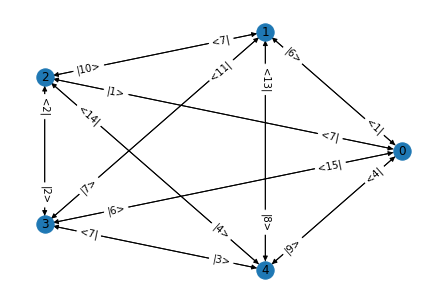

In [297]:
pos = nx.circular_layout(G)
#graph = nx.draw(G,pos,with_labels = True, connectionstyle='arc3, rad = 0.1')
graph = nx.draw(G,pos,with_labels = True)
graph = nx.draw_networkx_edge_labels(G,pos,edge_labels = edge_label,label_pos = 0.8)

In [310]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (0, 0), (1, 0), (1, 2), (1, 1), (2, 0), (2, 1), (2, 2)])

In [311]:
pos

{0: array([1.00000000e+00, 1.98682151e-08]),
 1: array([-0.50000007,  0.86602542]),
 2: array([-0.49999993, -0.86602544])}

In [312]:
Channel_link_general

array([[  0.,   7.,  12.,   5.,   8.,   6.],
       [  0., 100.,   1.,   7.,  15.,   4.],
       [  0.,   6., 100.,   7.,  11.,  13.],
       [  0.,   1.,  10., 100.,   2.,  14.],
       [  0.,   6.,   7.,   2., 100.,   7.],
       [  0.,   9.,   8.,   4.,   3., 100.]])

In [313]:
H = nx.from_numpy_matrix(Channel_link_general,create_using=nx.DiGraph(directed=True))
pos = nx.circular_layout(H,center=(1, 1))
#graph = nx.draw(G,pos,with_labels = True, connectionstyle='arc3, rad = 0.1')


In [314]:
edge_label = {}
for j, edge in enumerate(H.edges()):
    #edge_label.update({(edge[0],edge[1]): "<"+ str(Channel_link_general[edge[0]+1,edge[1]+1])+ "|" +str(Channel_link_general[edge[1]+1,edge[0]+1])+">" })
    if edge[1] > edge[0]:
        edge_label.update({(edge[0],edge[1]): "<" + str(np.int(Channel_link_general[edge[0],edge[1]])) + "|" })
    else:
        edge_label.update({(edge[0],edge[1]): "|" + str(np.int(Channel_link_general[edge[0],edge[1]])) + ">" })

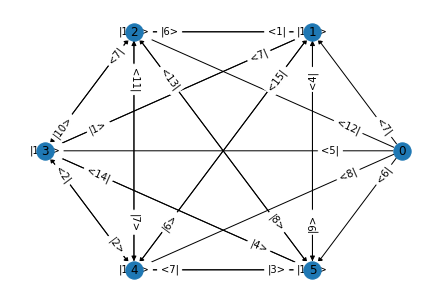

In [315]:
graph = nx.draw(H,pos,with_labels = True,connectionstyle='arc3, rad = 0.0')
labels = nx.get_edge_attributes(H,'weight')
graph2 = nx.draw_networkx_edge_labels(H,pos,edge_labels=edge_label,label_pos = 0.8)

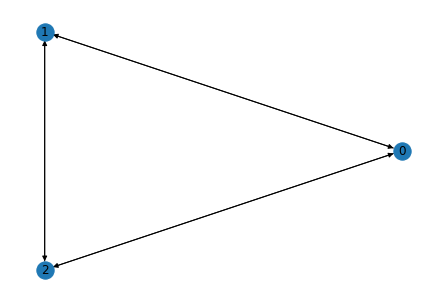

In [316]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph and add a self-loop to node 0
G = nx.complete_graph(3, create_using=nx.DiGraph)
G.add_edge(0, 0)
pos = nx.circular_layout(G)

# As of version 2.6, self-loops are drawn by default with the same styling as
# other edges
nx.draw(G, pos, with_labels=True)

# Add self-loops to the remaining nodes
edgelist = [(1, 1), (2, 2)]
G.add_edges_from(edgelist)

# Draw the newly added self-loops with different formatting
nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")

plt.show()